In [1]:
%matplotlib inline
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from sklearn import metrics

In [26]:
df_train = pd.read_csv('train.csv')
X_t = [Chem.MolFromSmiles(smiles) for smiles in df_train['Smiles']]
Xtrain = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in X_t]
Ytrain = df_train['Activity'].values.tolist()

df_train = pd.read_csv('val.csv')
X_v = [Chem.MolFromSmiles(smiles) for smiles in df_train['Smiles']]
Xtest = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in X_v]
Ytest = df_train['Activity'].values.tolist()

In [27]:
def met(Ytest, Ypre):
    ACC = metrics.accuracy_score(Ytest, Ypre)
    print("ACC: %.3f" % ACC)

    PRE = metrics.precision_score(Ytest, Ypre)
    print("PRE: %.3f" % PRE)

    TPR = metrics.recall_score(Ytest, Ypre)
    print("TPR: %.3f" % TPR)

    MCC = metrics.matthews_corrcoef(Ytest, Ypre)
    print("MCC: %.3f" % MCC)

    AUC = metrics.roc_auc_score(Ytest, Ypre)
    print("AUC: %.3f" % AUC)

In [28]:
### KNN Classifier    
from sklearn.neighbors import KNeighborsClassifier
 
knn = KNeighborsClassifier()
knn.fit(Xtrain, Ytrain)
Ypre = knn.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.856
PRE: 0.817
TPR: 0.938
MCC: 0.717
AUC: 0.851


In [29]:
### SVM Classifier    
from sklearn.svm import SVC
 
svmc = SVC(kernel='rbf', probability=True)
svmc.fit(Xtrain, Ytrain)
Ypre = svmc.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.853
PRE: 0.837
TPR: 0.896
MCC: 0.706
AUC: 0.850


In [30]:
### GaussianNB
from sklearn.naive_bayes import GaussianNB
 
gnb = GaussianNB()
gnb.fit(Xtrain, Ytrain)
Ypre = gnb.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.765
PRE: 0.717
TPR: 0.919
MCC: 0.546
AUC: 0.756


In [31]:
### Logistic Regression Classifier    
from sklearn.linear_model import LogisticRegression
 
lgc = LogisticRegression()
lgc.fit(Xtrain, Ytrain)
Ypre = lgc.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.860
PRE: 0.843
TPR: 0.904
MCC: 0.721
AUC: 0.858


d:\Anaconda\envs\rdkit\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
### Random Forest Classifier    
from sklearn.ensemble import RandomForestClassifier
 
rfc = RandomForestClassifier()
rfc.fit(Xtrain, Ytrain)
Ypre = rfc.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.871
PRE: 0.849
TPR: 0.919
MCC: 0.742
AUC: 0.868


In [33]:
### Decision Tree Classifier    
from sklearn import tree
 
dtc = tree.DecisionTreeClassifier()
dtc.fit(Xtrain, Ytrain)
Ypre = dtc.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.838
PRE: 0.824
TPR: 0.882
MCC: 0.675
AUC: 0.835


In [34]:
### XGBoost Classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(Xtrain, Ytrain)
Ypre = xgb.predict(Xtest)
met(Ytest, Ypre)

ACC: 0.860
PRE: 0.836
TPR: 0.916
MCC: 0.722
AUC: 0.857


In [35]:
smiles = ['NC1=NC(C(NC2=CC=CC=N2)=O)=CN3C1=NC4=CC=CC=C34',
          'FC(F)(F)c(c1)ccc2c1nc(n23)c(N)nc(c3)Cc4cccc(c4)C(=O)NCCO',
          'CNC(=O)CNc1cccc(c1)Cc(c2)nc(N)c(n23)nc4c3ccc(c4)C',
          'OCCNC(=O)c(c1)nc(N)c(n12)nc3c2ccc(c3)C(F)(F)F'
          ]

labels = ['12o',
         'ABA-1266',
         'ABN-2100',
         'AAL-9931'
         ]

def predict(model, smiles, labels):
    X_pred = [Chem.MolFromSmiles(smi) for smi in smiles]
    X_pred_ecfp = [AllChem.GetMorganFingerprintAsBitVect(mol, 2) for mol in X_pred]
    y_pred = model.predict(X_pred_ecfp)
    for label, pred in zip(labels, y_pred):
        print(f'{label} Activity: {pred}')

#Random Forest Prediction
predict(rfc, smiles, labels)

#XGBoost Prediction
predict(xgb, smiles, labels)

12o Activity: 1
ABA-1266 Activity: 0
ABN-2100 Activity: 0
AAL-9931 Activity: 1
12o Activity: 0
ABA-1266 Activity: 0
ABN-2100 Activity: 0
AAL-9931 Activity: 0


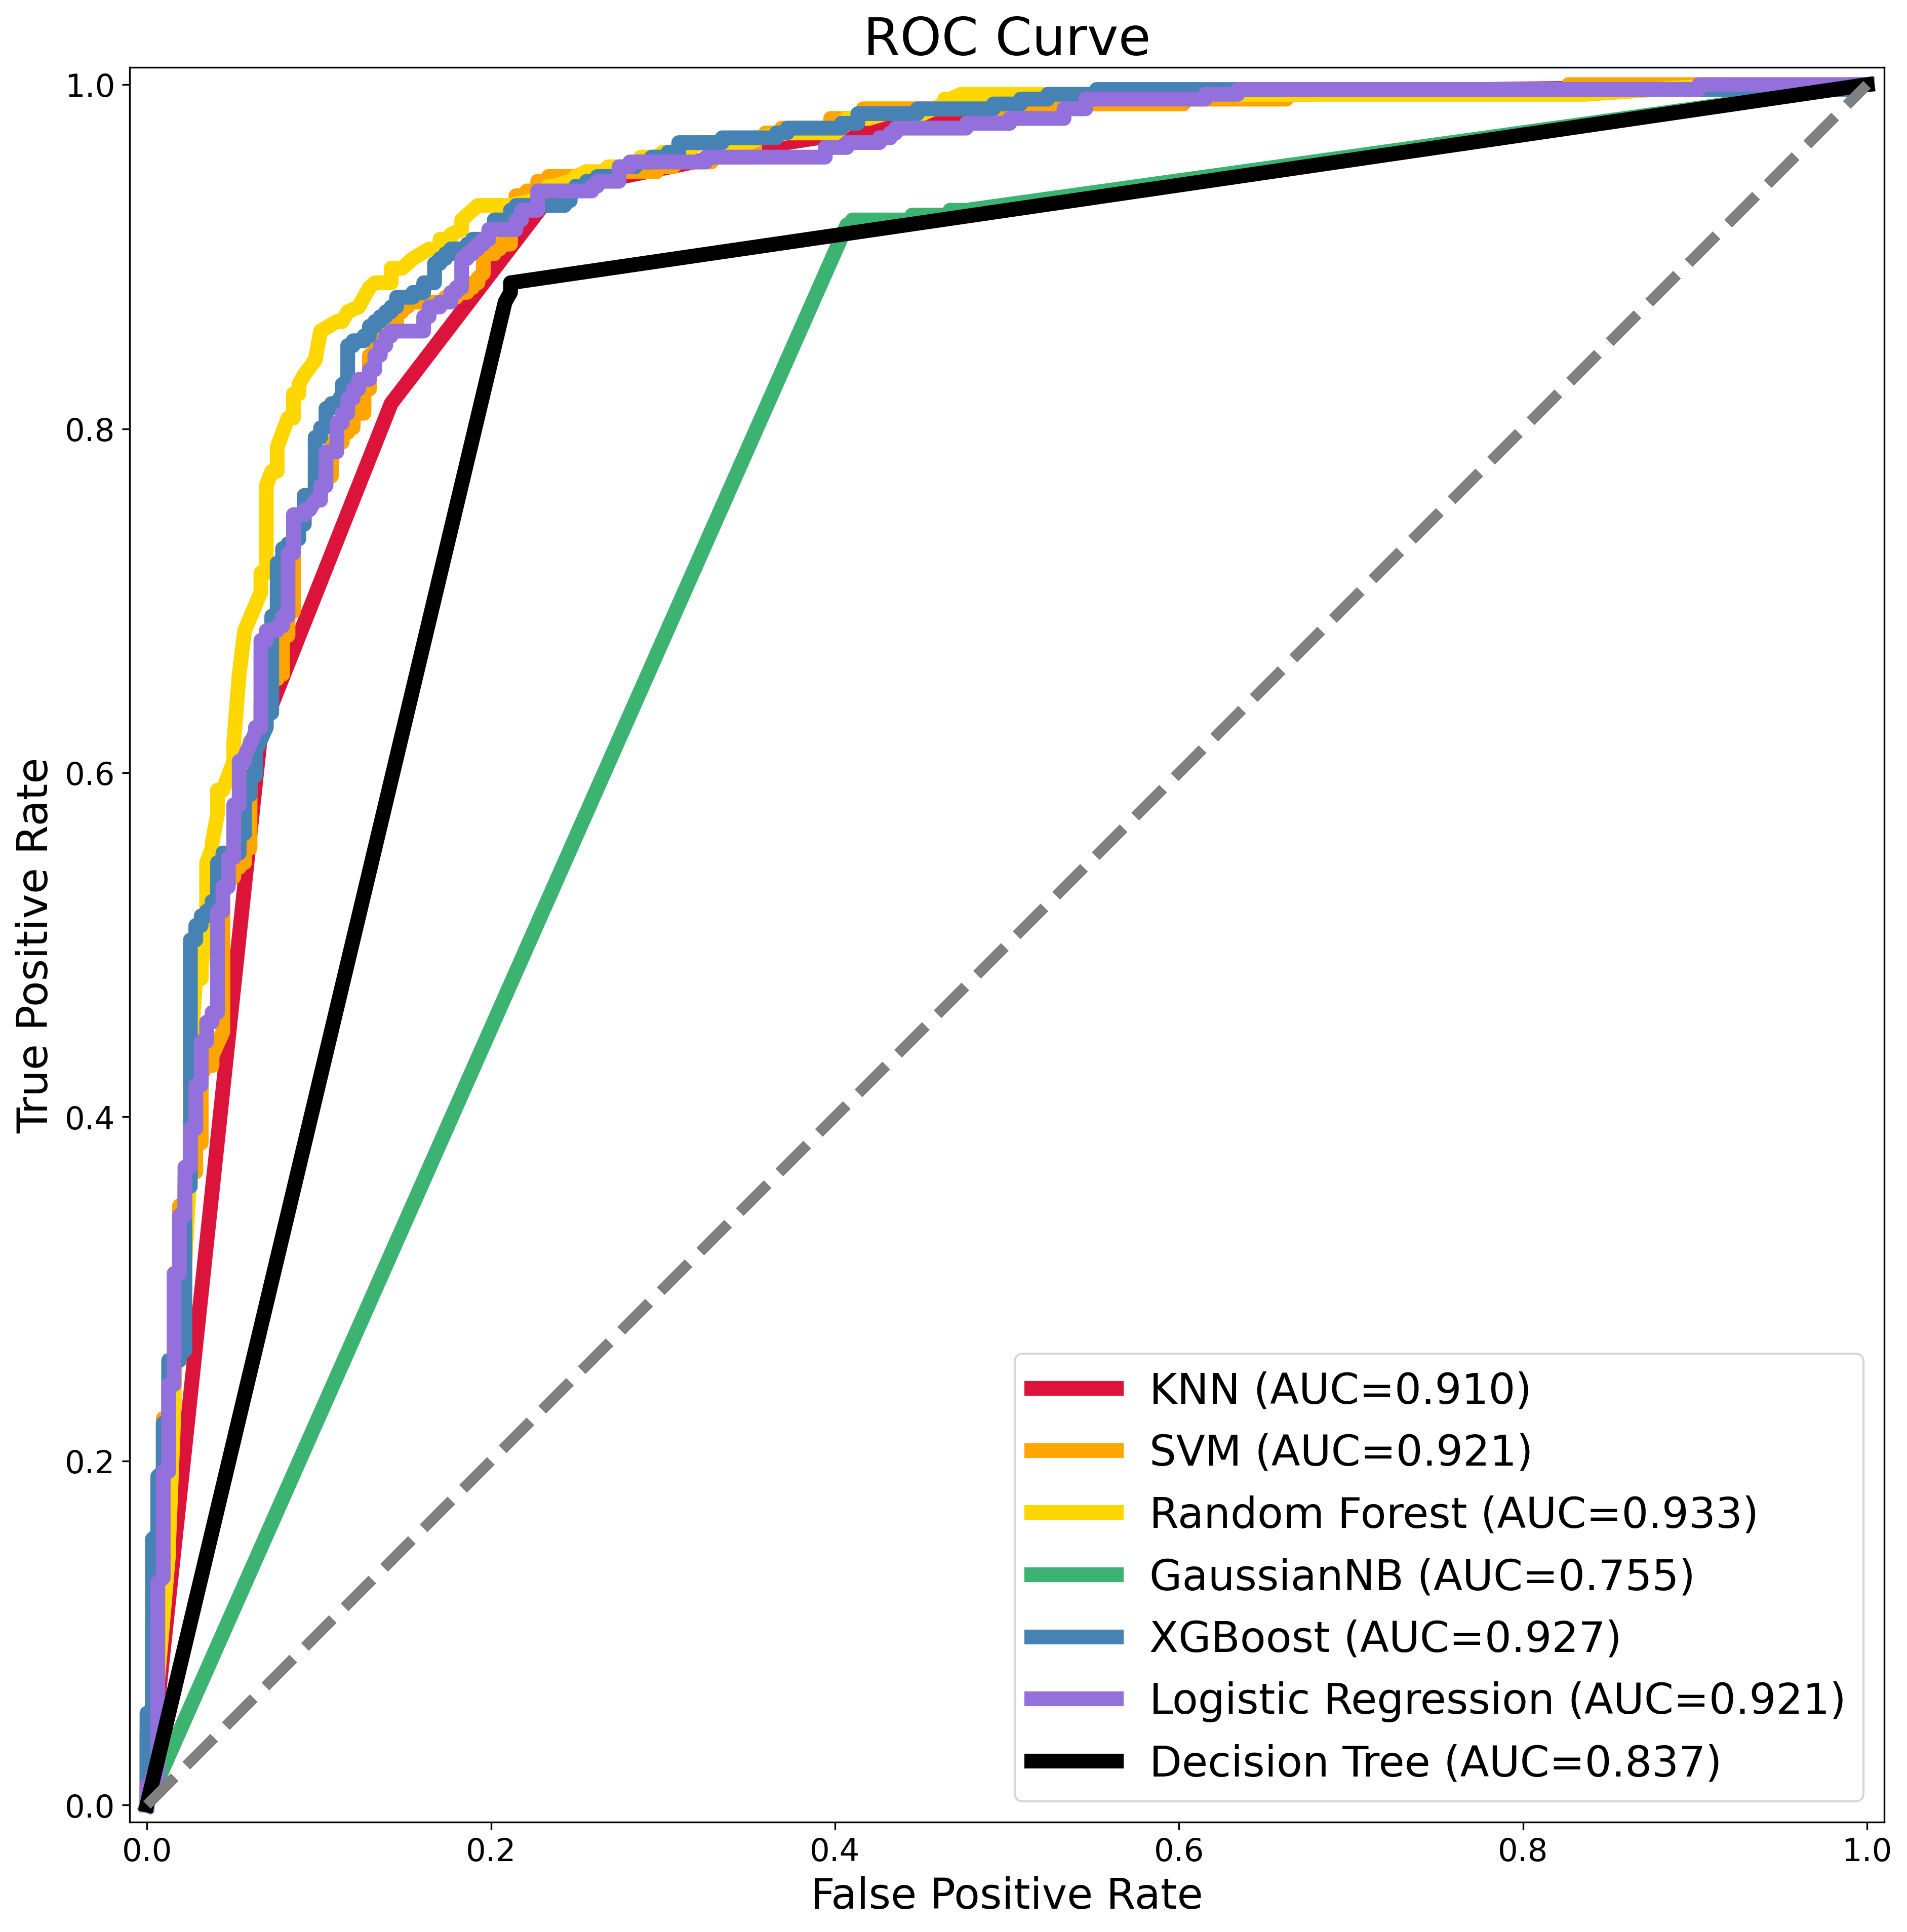

In [36]:
def multi_models_roc(names, sampling_methods, colors, Xtest, Ytest, save=True, dpin=300):

        plt.figure(figsize=(15, 15), dpi=dpin)

        for (name, method, colorname) in zip(names, sampling_methods, colors):
            
            y_test_preds = method.predict(Xtest)
            y_test_predprob = method.predict_proba(Xtest)[:,1]
            fpr, tpr, thresholds = metrics.roc_curve(Ytest, y_test_predprob)
            
            plt.plot(fpr, tpr, lw=7, label='{} (AUC={:.3f})'.format(name, metrics.auc(fpr, tpr)),color = colorname)
            plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
            plt.axis('square')
            plt.xlim([-0.01, 1.01])
            plt.ylim([-0.01, 1.01])
            plt.xlabel('False Positive Rate',fontsize=20)
            plt.ylabel('True Positive Rate',fontsize=20)
            plt.tick_params(labelsize=15)
            plt.title('ROC Curve',fontsize=25)
            plt.legend(loc='lower right',fontsize=20)

        if save:
            plt.savefig('multi_models_roc.png')
            
        return plt

names = ['KNN',
         'SVM',
         'Random Forest',
         'GaussianNB',
         'XGBoost',
         'Logistic Regression',
         'Decision Tree'
         ]

sampling_methods = [knn,
                    svmc,
                    rfc,
                    gnb,
                    xgb,
                    lgc,
                    dtc
                   ]

colors = ['crimson',
          'orange',
          'gold',
          'mediumseagreen',
          'steelblue', 
          'mediumpurple',
          'Black'
         ]

#ROC curves
train_roc_graph = multi_models_roc(names, sampling_methods, colors, Xtest, Ytest, save = False)
train_roc_graph.savefig('ROC_Test_all.png')